<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week02_FirstExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: First Machine Learning Example

**Reading**: Chapter 1. The Machine Learning Landscape



## What is Machine Learning?

Machine Learning is the science of programming computers so they can perform certain task with knowledge learned from data.

**Example: spam filter**
- Task: to flag spam for new emails
- Data: existing emails with labels (either spam or non-spam)
- Performance measure:
    - percentage of correctly labeled emails
    - percentage of a spam email being labeled correctly.
    - percentage of a non-spam email being labeled correctly.
    - Classification efficiency
    - ...

## Why Use Machine Learning?

Traditional approach for spam filter:
1. Choose features of spam emails manually: "4U", "credit card", "free", "amazing"
2. Write an program to detect exactly the features you chose
3. Test the program and modify the features until satisfactory

Drawbacks of traditional approach: 
1. A large amount of features are needed - hard to maintain
2. Spammers may change their writing to avoid explicit rules: change "4U" to "For U".
3. For some complex problems, manually-engineered features are not good enough: hand-written digits

Machine Learning models:
1. Automatically learns which words and phrases are good predictors of spam. 
2. Since the program is not a stack of explicit rules, it is much shorter, easier to maintain, and most likely more accurate.
3. With new training data, the Machine Learning model can update automatically to capture new indicators of spam emails.

What Machine Learning is great for:
1. Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
2. Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
3. Fluctuating environments: a Machine Learning system can adapt to new data.
4. Large amount of data: With Machine Learning, computers process big data faster than human.


## First Example: Men's Height in the United States

As an illustration of machine learning practice, let's consider the task of understanding the trend of American men's height in the 20th century. This project requires the following stages:
- Data preparation
- Data exploration
- Model training
- Model evaluation
- Model application

### 1. Download Data
- Go to website:  https://ourworldindata.org/human-height
- Find the interactive chart "Increase of human height over two centuries"
- Click the "Download" tab, and download a CSV (comma-separated-values) file containing height data.

After downloading, you can open it a text editor to view its content.

### 2. Upload the CSV file to Google Colab
- Click "Files" icon on the left column.
- Click "Upload to session storage"
- Upload the CSV file.

Afterwards, you should see the file listed in the files tab.


In [52]:
# Bash command "ls" will show the files
!ls

average-height-of-men-for-selected-countries.csv  sample_data


### 3. Load Data into Python
- Import numpy, pandas, and matplotlib.
- Load the data as a DataFrame using the following statement:
`raw_data = pd.read_csv(filename, sep=',')`

Now the data in the .csv file are loaded to the DataFrame `raw_data`. You can display its first 5 rows using `raw_data.head()`.

In [53]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline  

In [54]:
raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv", sep=',')

In [55]:
raw_data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


### DataFrame
Data frame is a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. A data frame's row may contain different types of values: numeric, character, logical, etc.

Data frames in Python come with the Pandas libarary, and they are defined as a two-dimensional labeled data structures with columns of potentially different types.

### 4. Extract US Data
- Create a filter on the rows with condition "Entity = United States"
- Use the filter to select rows related to US.
- Create another filter with condition "Year >= 1900", and use it to filter the data.
- Display the resulting data frame.

In [56]:
filter1 = (raw_data['Entity'] == "United States")
print(filter1)

0       False
1       False
2       False
3       False
4       False
        ...  
1245    False
1246    False
1247    False
1248    False
1249    False
Name: Entity, Length: 1250, dtype: bool


In [57]:
filter1 = (raw_data['Entity'] == "United States")
data = raw_data[filter1]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6
1199,United States,USA,1870,171.1
1200,United States,USA,1880,169.5
1201,United States,USA,1890,169.1
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1


In [58]:
# You can combine the two steps in one statement
data = raw_data[raw_data['Entity'] == "United States"]
data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6


In [59]:
# Exercise:
# Extract USA data since 1900.

filter2 = (data["Year"] >= 1900)
data = data[filter2]
data


,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1
1204,United States,USA,1920,173.1
1205,United States,USA,1930,173.4
1206,United States,USA,1940,176.1
1207,United States,USA,1950,177.1
1208,United States,USA,1960,177.3
1209,United States,USA,1970,178.3
1210,United States,USA,1980,179.0


In [60]:
# We can apply both conditions in one statement.
# Use bitwise operator: & (and), | (or), ~ (not)
filter3 = (raw_data['Entity'] == "United States") & (raw_data['Year'] >= 1900)
# print(filter3)
data = raw_data[filter3]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1
1204,United States,USA,1920,173.1
1205,United States,USA,1930,173.4
1206,United States,USA,1940,176.1
1207,United States,USA,1950,177.1
1208,United States,USA,1960,177.3
1209,United States,USA,1970,178.3
1210,United States,USA,1980,179.0


### 5. Clean the Dataset
1. Reset the index.
2. Remove Entity and Code column.
3. Give a proper name to height column

In [61]:
data = data.set_index(["Year"])
data.head()

,Entity,Code,Human Height (University of Tuebingen (2015))
Year,,,
1900,United States,USA,170.0
1910,United States,USA,172.1
1920,United States,USA,173.1
1930,United States,USA,173.4
1940,United States,USA,176.1


In [62]:
data.drop(["Entity", 'Code'], axis=1, inplace=True) 
# axis specifies row drop or column drop
# axis=0 means row drop
# axis=1 means column drop
# inplace determines whether the modification is done to the original data frame
# inplace=True means modifying the original data frame
# inplace=False means create a new data frame for the modification
data.head()

,Human Height (University of Tuebingen (2015))
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1


In [63]:
# Example: drop the first row and keep the results as a new data frame
# data
data_new = data.drop([1900, 1910, 1960], axis=0, inplace=False)
data_new
# data

,Human Height (University of Tuebingen (2015))
Year,
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1970,178.3
1980,179.0


In [64]:
data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"})
data

,Height(cm)
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1960,177.3
1970,178.3
1980,179.0


### 6. Plot height vs. year
- Extract the list of heights.
- Extract the list of years.
- Use `plt.plot()` to create a scatter plot.

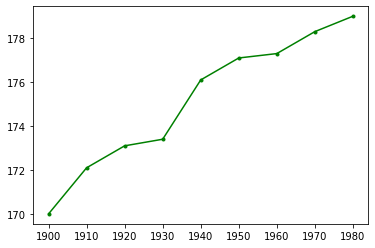

In [65]:
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'g.-')

**How would you describe the trend?**
1. Is there a trend?

Answer: There is an linear upward trend.
2. Is the trend upward or downward?

Answer: upward
3. It the trend consistent?

Answer: pretty consistent

**Conclusion**: During the 20th century, US men's height increases at a steady rate.

## 7. Modeling

Since we haven't studied any modeling method yet, let's use our intuition to find a function that describes the relation between year and height.
- Linear model ($height = m \cdot year + b$) seems a good fit to the data.
- What is a good value for $m$?
- What is a good value for $b$?
- Plot the line represented by the linear model
    - Create a list of x-coordinates using `np.linspace`
    - Calculate the corresponding y-coordinates
    - Use these two lists to plot the line.

In [66]:
# Calculate the average increase per year between 1900 and 1980
# Two points: (1900, 170.0) and (1980, 179.0)
# What is the slope of the line connecting these two points?

m = (179 - 170) / (1980 - 1900)
print("Slope", m)

Slope 0.1125


In [67]:
# Let the slope be the average rate of increase.
# If the model is height = m * year + b, 
# find the value of b so that point (1900, 170.0) lies on the line.
height = 170
year = 1900
b = height - m * year
print("Y-Intercept:", b)

Y-Intercept: -43.75


Now our linear model is: height = 0.1125 * year - 43.75

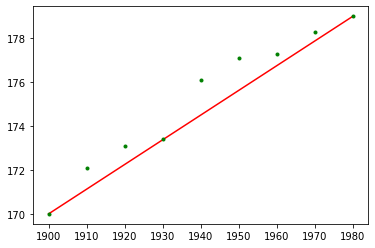

In [68]:
# Plot the model line.
years = np.array([1900, 1940, 1980])
heights = 0.1125 * years - 43.75

plt.plot(years, heights, 'r-')

# show the data points on this plot
plt.plot(data.index, data['Height(cm)'], 'g.')

**Can you find another line that fits the model better?**

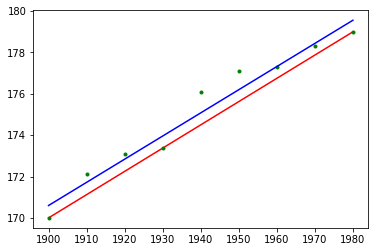

In [69]:
m2 = 0.112
b2 = -42.2

plt.plot(years, heights, 'r-')
plt.plot(data.index, data['Height(cm)'], 'g.')

# plot the second line on this graph
heights2 = m2 * years + b2 
plt.plot(years, heights2, 'b-')

## 8. Model Evaluation
- Objective: find a linear model whose predictions are *close* to the actual values.
- Metric on closeness: **mean squared error (MSE):**
$$MSE = \frac{1}{\textit{number of data}}\sum_{\text{(x, y) in dataset}}(mx + b - y)^2$$

Now that we have multiple model candidates, which one gives the smallest MSE?

In [70]:
# Example: Calculate the error for 1930
m = 0.1125
b = -43.75

# For the data point about 1930:
x = 1930
y = 173.4

# Prediction of the model for 1930:
prediction = m * x + b
print("Predicton for 1930:", prediction)

# Squared Error for 1930:
error = (prediction - y) ** 2
print("Error for 1930:", error)

Predicton for 1930: 173.375
Error for 1930: 0.0006250000000002842


In [75]:
# Calculate errors for each year

data.index

errors = []

for year in data.index:
    # Calculate the squared error for that year
    # error = ???

    # append the error to the errors list
    errors.append(error)

# Now you should have a list of errors.
print(errors)

# Calculate the mean squared error, use np.mean() function
print(np.mean(errors))

Int64Index([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980], dtype='int64', name='Year')

In [72]:
# Calculate the mean squared error



## 9: Use the Model
- What is your prediction on the average height in 1890?, 2000? 2050?
- Check with the raw dataset and see if your 1890 prediction is close.

In [73]:
# Calculate the model prediction for year = 1890



In [74]:
# Find the actual average height for year 1890.



# Week 2 Homework
Build a linear model (height = m * year + b) to describe the trend of height increase for **United Kingdom** between 1900 and 1980. Compute the mean square error of your model, and display the model line together with the data points.